In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def marcenko_pastur(sigma_squared, c, z): # No Sigma_epsilon
    """
    This function computes the value of Marcenko-Pastur Theorem: m(-z, c)
    please ignore sigma_squared for now
    :param sigma_squared: set as 1
    :param c: c = M/(N*T)
    :param z: a vector of ridge penalty parameter
    :return: value of m(-z)
    """
    sqrt_term = np.sqrt((sigma_squared * (1 - c) + z) ** 2 + 4 * c * sigma_squared * z)
    tmp = - (sigma_squared * (1 - c) + z) + sqrt_term
    tmp = tmp / (2 * c * sigma_squared * z)
    return tmp

In [62]:
def xi_function(c, z, m): # Only works when Sigma is an identity matrix
    """
    This function computes xi(z) by Eq. (18) in Prop 15
    :param c: c = M/(N*T)
    :param z: a vector of ridge penalty parameter
    :param m: m = marcenko_pasturxi_function(1, c, z)
    :return: xi = (1 - z * m) / ((1 / c) - 1 + z * m)
    """
    return (1 - z * m) / ((1 / c) - 1 + z * m)

## Expected returns for correctly specified model

/var/folders/cp/lfrdk1xn4hz1qzq2p4zmy65w0000gn/T/ipykernel_84995/2689831613.py:12: RuntimeWarning: invalid value encountered in divide
  tmp = tmp / (2 * c * sigma_squared * z)
/var/folders/cp/lfrdk1xn4hz1qzq2p4zmy65w0000gn/T/ipykernel_84995/2571232274.py:9: RuntimeWarning: divide by zero encountered in divide
  return (1 - z * m) / ((1 / c) - 1 + z * m)


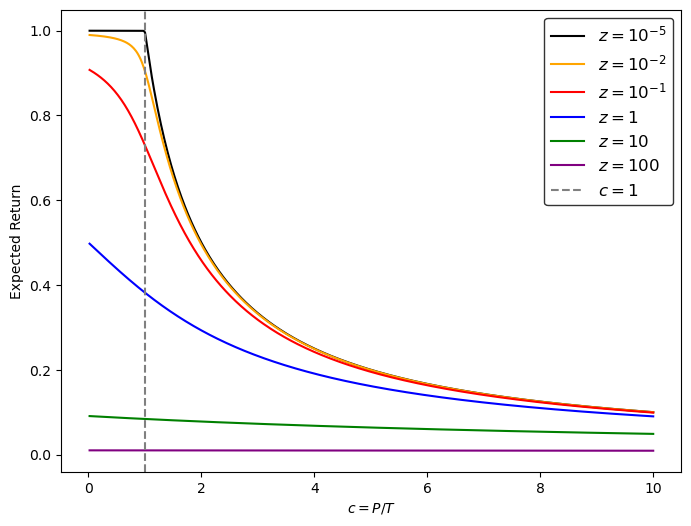

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the complexity range
c = np.linspace(0, 10, 500)

# Define the function for Z*(z, c)
def Z_star(z, c):
    # Your xi_function and marcenko_pastur functions should be defined here
    return z * (1 + xi_function(c, z, marcenko_pastur(1, c, z)))

# Define the expected return function E[RM(z; P; T)]
def expected_return(z, c, E_F=1,E_FF=1):  # Assume E[F]'(Z*I + E[FF'])^(-1)E[F] is a function of Z_star
    return E_F / (Z_star(z, c) + E_FF) *E_F

# Define different values of z and their corresponding colors
z_values = [1e-5, 1e-2, 1e-1, 1, 10, 100]
colors = ['black', 'orange', 'red', 'blue', 'green', 'purple']  # Define your desired colors

# Create labels using LaTeX for exponents
labels = [r'$z = 10^{-5}$', r'$z = 10^{-2}$', r'$z = 10^{-1}$', r'$z = 1$', r'$z = 10$', r'$z = 100$']

# Plot the graphs
plt.figure(figsize=(8, 6))
for z, color, label in zip(z_values, colors, labels):
    plt.plot(c, expected_return(z, c), label=label, color=color)

# Add the vertical line and label it
plt.axvline(x=1, color='grey', linestyle='--', label=r'$c = 1$')

# Customize the plot
plt.xlabel(r'$c = P/T$')
plt.ylabel('Expected Return')
#plt.title('Expected Return for Correctly Specified Model')

# Customize the legend
plt.legend(loc='upper right', frameon=True, edgecolor='black', fontsize='12', fancybox=True)
#plt.grid(True)
plt.savefig('Plots/Expected_Return_Correctly_Specified_Model.png')
plt.show()


## Expected Returns for Mis-Specified Model

/var/folders/cp/lfrdk1xn4hz1qzq2p4zmy65w0000gn/T/ipykernel_84995/2689831613.py:12: RuntimeWarning: invalid value encountered in divide
  tmp = tmp / (2 * c * sigma_squared * z)
/var/folders/cp/lfrdk1xn4hz1qzq2p4zmy65w0000gn/T/ipykernel_84995/2571232274.py:9: RuntimeWarning: divide by zero encountered in divide
  return (1 - z * m) / ((1 / c) - 1 + z * m)


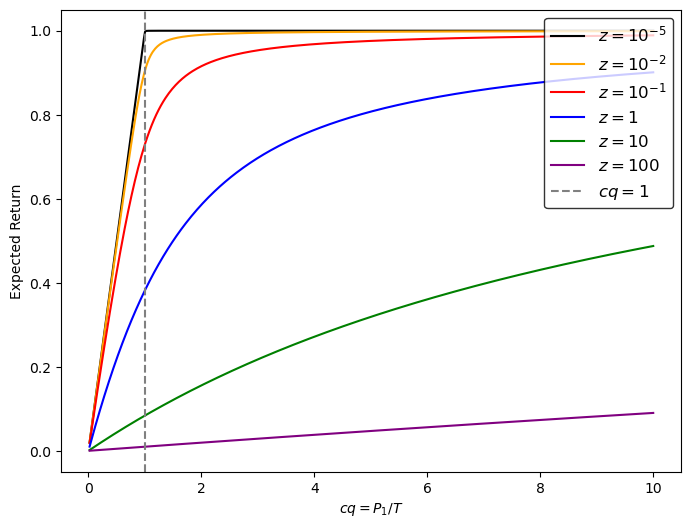

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define the complexity range
c = np.linspace(0, 10, 500)

# Define the function for Z*(z, c)
def Z_star(z, c):
    # Your xi_function and marcenko_pastur functions should be defined here
    return z * (1 + xi_function(c, z, marcenko_pastur(1, c, z)))

# Define the expected return function E[RM(z; P; T)]
# def expected_return(z, c, E_F=1):  # Assume E[F]'(Z*I + E[FF'])^(-1)E[F] is a function of Z_star
#     return c / (Z_star(z, c) + E_F +c)

def expected_return(z, c, E_FF=1):
    return c/ (Z_star(z, c) + E_FF) 


# Define different values of z and their corresponding colors
z_values = [1e-5, 1e-2, 1e-1, 1, 10, 100]
colors = ['black', 'orange', 'red', 'blue', 'green', 'purple']  # Define your desired colors

# Create labels using LaTeX for exponents
labels = [r'$z = 10^{-5}$', r'$z = 10^{-2}$', r'$z = 10^{-1}$', r'$z = 1$', r'$z = 10$', r'$z = 100$']

# Plot the graphs
plt.figure(figsize=(8, 6))
for z, color, label in zip(z_values, colors, labels):
    plt.plot(c, expected_return(z, c), label=label, color=color)

# Add the vertical line and label it
plt.axvline(x=1, color='grey', linestyle='--', label=r'$cq = 1$')

# Customize the plot
plt.xlabel(r'$cq = P_1/T$')
plt.ylabel('Expected Return')
#plt.title('Expected Return for Mis-specified Model')

# Customize the legend
plt.legend(loc='upper right', frameon=True, edgecolor='black', fontsize='12', fancybox=True)
#plt.grid(True)
plt.savefig('Plots/Expected_Return_Mis-specified_Model.png')
plt.show()


/var/folders/cp/lfrdk1xn4hz1qzq2p4zmy65w0000gn/T/ipykernel_84995/2689831613.py:12: RuntimeWarning: invalid value encountered in divide
  tmp = tmp / (2 * c * sigma_squared * z)
/var/folders/cp/lfrdk1xn4hz1qzq2p4zmy65w0000gn/T/ipykernel_84995/2571232274.py:9: RuntimeWarning: divide by zero encountered in divide
  return (1 - z * m) / ((1 / c) - 1 + z * m)


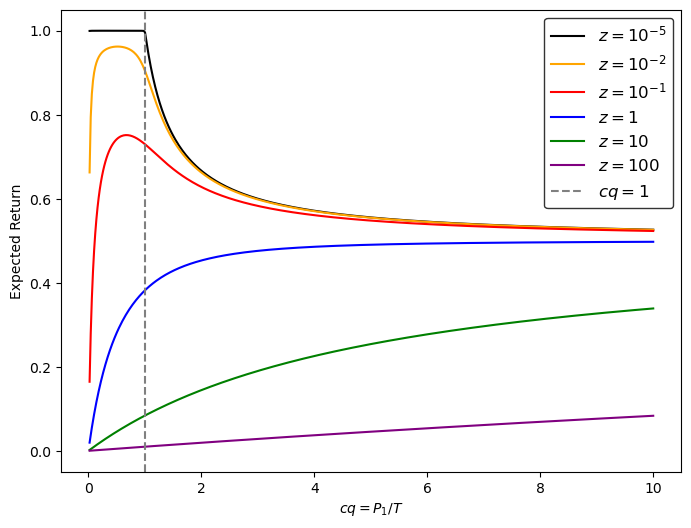

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Define the complexity range
c = np.linspace(0, 10, 500)

# Define the function for Z*(z, c)
def Z_star(z, c):
    # Your xi_function and marcenko_pastur functions should be defined here
    return z * (1 + xi_function(c, z, marcenko_pastur(1, c, z)))

# Define the expected return function E[RM(z; P; T)]
# def expected_return(z, c, E_F=1):  # Assume E[F]'(Z*I + E[FF'])^(-1)E[F] is a function of Z_star
#     return c / (Z_star(z, c) + E_F +c)

def expected_return(z, c, E_FF=1):
    return (c)/ (Z_star(z, c) + E_FF*c) 


# Define different values of z and their corresponding colors
z_values = [1e-5, 1e-2, 1e-1, 1, 10, 100]
colors = ['black', 'orange', 'red', 'blue', 'green', 'purple']  # Define your desired colors

# Create labels using LaTeX for exponents
labels = [r'$z = 10^{-5}$', r'$z = 10^{-2}$', r'$z = 10^{-1}$', r'$z = 1$', r'$z = 10$', r'$z = 100$']

# Plot the graphs
plt.figure(figsize=(8, 6))
for z, color, label in zip(z_values, colors, labels):
    plt.plot(c, expected_return(z, c), label=label, color=color)

# Add the vertical line and label it
plt.axvline(x=1, color='grey', linestyle='--', label=r'$cq = 1$')

# Customize the plot
plt.xlabel(r'$cq = P_1/T$')
plt.ylabel('Expected Return')
#plt.title('Expected Return for Mis-specified Model')

# Customize the legend
plt.legend(loc='upper right', frameon=True, edgecolor='black', fontsize='12', fancybox=True)
#plt.grid(True)
plt.savefig('Plots/Expected_Return_Mis-specified_Model_(under_different_assumptions).png')
plt.show()


